In [82]:
import pandas as pd
import seaborn as sns

In [83]:
hotels = pd.read_excel("Data Viz with Matplotlib & Seaborn/Data/HotelCustomersDataset.xlsx")

<Axes: xlabel='Age', ylabel='LodgingRevenue'>

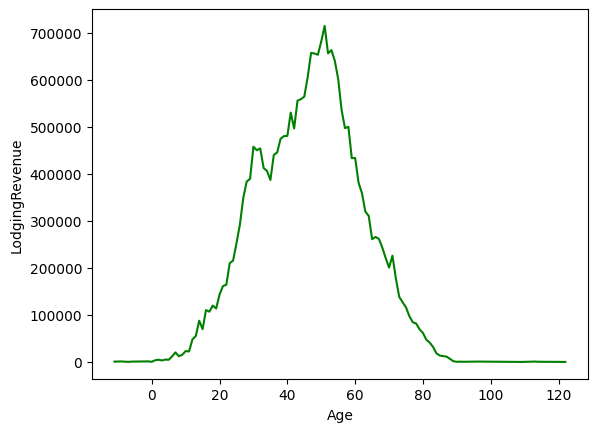

In [84]:
sns.lineplot(
    x='Age', 
    y='LodgingRevenue', 
    data=hotels,
    estimator=sum,
    errorbar=None,
    color='green'
    )

# Assignment 1: Bar Chart and Histogram

* Build a histogram of lodging revenue with Seaborn. Filter your data to rows where LodgingRevenue is less than 1500. 
* Then, build a horizontal bar chart plotting the average room nights stayed for our top 5 countries by revenue ("DEU", "FRA", "PRT", "GBR", "ESP"). Change the color palette.

In [85]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'LodgingRevenue is less than US$ 1500')

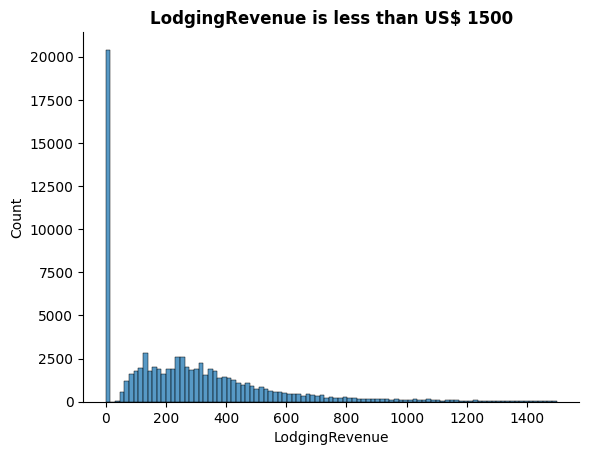

In [86]:
lodgind_revenue_less_1500 = hotels[hotels['LodgingRevenue'] < 1500]['LodgingRevenue'].sort_values()
sns.histplot(lodgind_revenue_less_1500)
sns.despine()
plt.title('LodgingRevenue is less than US$ 1500', weight='bold')

In [87]:
top_5_avg_roomnights = hotels[hotels['Nationality'].isin(["DEU", "FRA", "PRT", "GBR", "ESP"])].groupby('Nationality').agg({'RoomNights':'mean'}).sort_values('RoomNights', ascending=False)
top_5_avg_roomnights

,RoomNights
Nationality,
DEU,2.573690
FRA,2.497021
GBR,2.405499
ESP,2.218890
PRT,2.098301


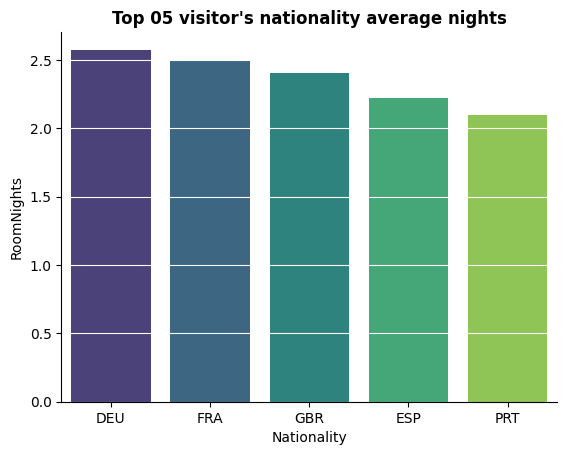

In [88]:
sns.barplot(
    x=top_5_avg_roomnights.index,
    y=top_5_avg_roomnights['RoomNights'],
    palette='viridis',
    hue=top_5_avg_roomnights.index,
    legend=False
)
sns.despine()
plt.title("Top 05 visitor's nationality average nights", weight='bold')
plt.grid(ls='-', axis='y', color='white')

In [89]:
lodgind_revenue_less_1500

47          0.00
50          0.00
6           0.00
27          0.00
32          0.00
          ...   
53640    1496.61
67036    1497.36
56792    1497.60
63834    1498.00
13857    1498.50
Name: LodgingRevenue, Length: 82411, dtype: float64

<Axes: xlabel='LodgingRevenue'>

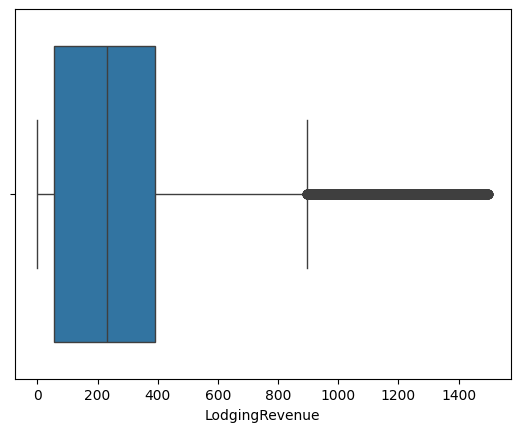

In [90]:
sns.boxplot(
    x=lodgind_revenue_less_1500
)

In [91]:
LR_countries = hotels[hotels['LodgingRevenue'] < 1500][['LodgingRevenue','Nationality']]
LR_countries = LR_countries[LR_countries['Nationality'].isin(["DEU", "FRA", "PRT", "GBR", "ESP"])].sort_values(('LodgingRevenue'))
LR_countries.head()

,LodgingRevenue,Nationality
83566,0.0,FRA
83581,0.0,DEU
2,0.0,DEU
27,0.0,FRA
32,0.0,PRT


<Axes: xlabel='LodgingRevenue', ylabel='Nationality'>

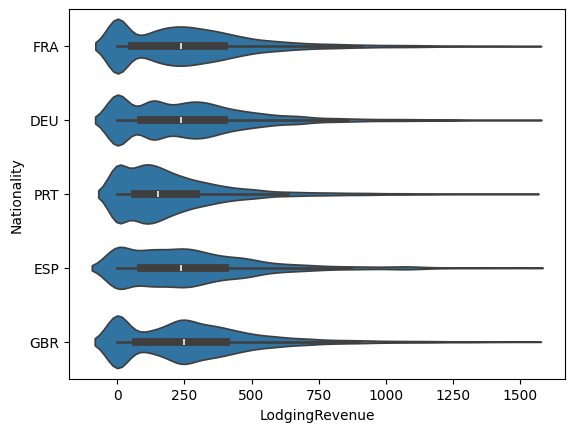

In [92]:
sns.violinplot(
    data=LR_countries,
    x=LR_countries['LodgingRevenue'],
    y=LR_countries['Nationality'],
)

<Axes: ylabel='RoomNights'>

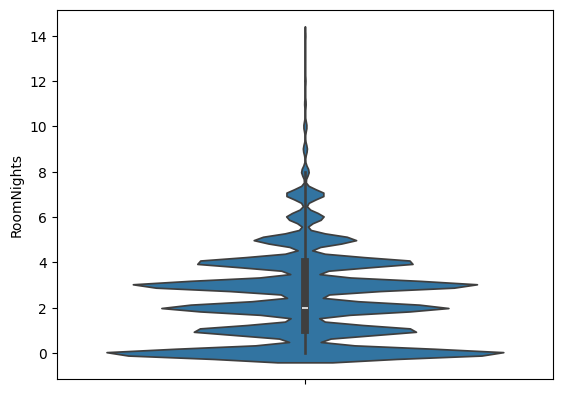

In [93]:
sns.violinplot(y='RoomNights', data=hotels.query('RoomNights < 15'))

# Assigment 3: Linear Relationship Plots

* Build a plot with a regression line comparing LodgingRevenue as y and RoomNights as x for rows in our top 5 countries.
* Then, build the same chart in bullet 1 but with a separate line for each of our top 5 countries. Which country appears to pay the most per night?
* Finally, build a pairplot with the columns: Age, LodgingRevenue, OtherRevenue, PersonsNights, RoomNights, and DaysSinceLastStay

In [98]:
top_five_countries = hotels[hotels['Nationality'].isin(["DEU", "FRA", "PRT", "GBR", "ESP"])].sort_values(by='LodgingRevenue')

In [101]:
top_five_countries.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
83512,83513,FRA,49.0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83513,83514,FRA,16.0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83533,83534,FRA,21.0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
92,93,ESP,70.0,1094,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,95,ESP,57.0,1094,0,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<Axes: xlabel='RoomNights', ylabel='LodgingRevenue'>

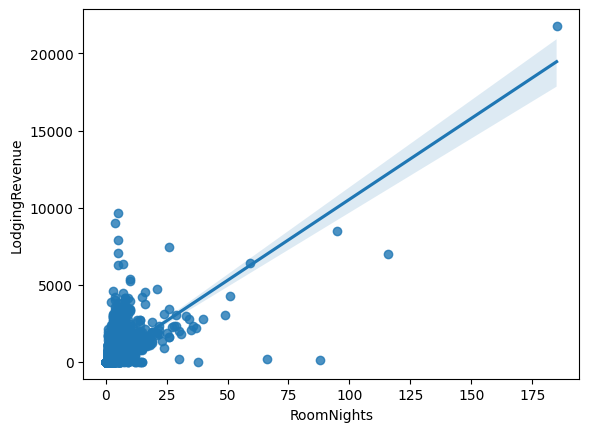

In [105]:
sns.regplot(
    data=top_five_countries,
    x='RoomNights',
    y='LodgingRevenue', 
)

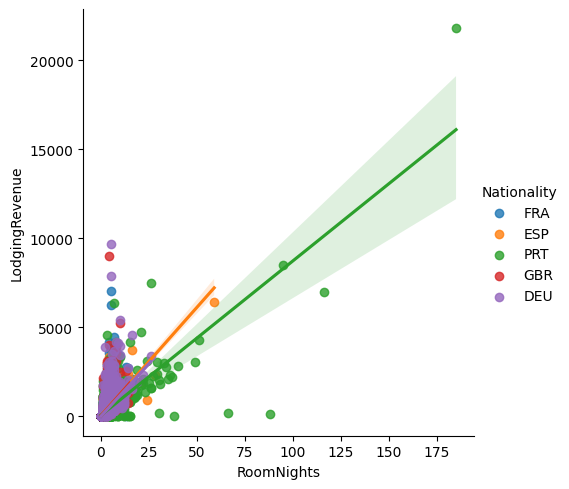

In [108]:
sns.lmplot(
    data=top_five_countries,
    y='LodgingRevenue',
    x='RoomNights',
    hue='Nationality'
)

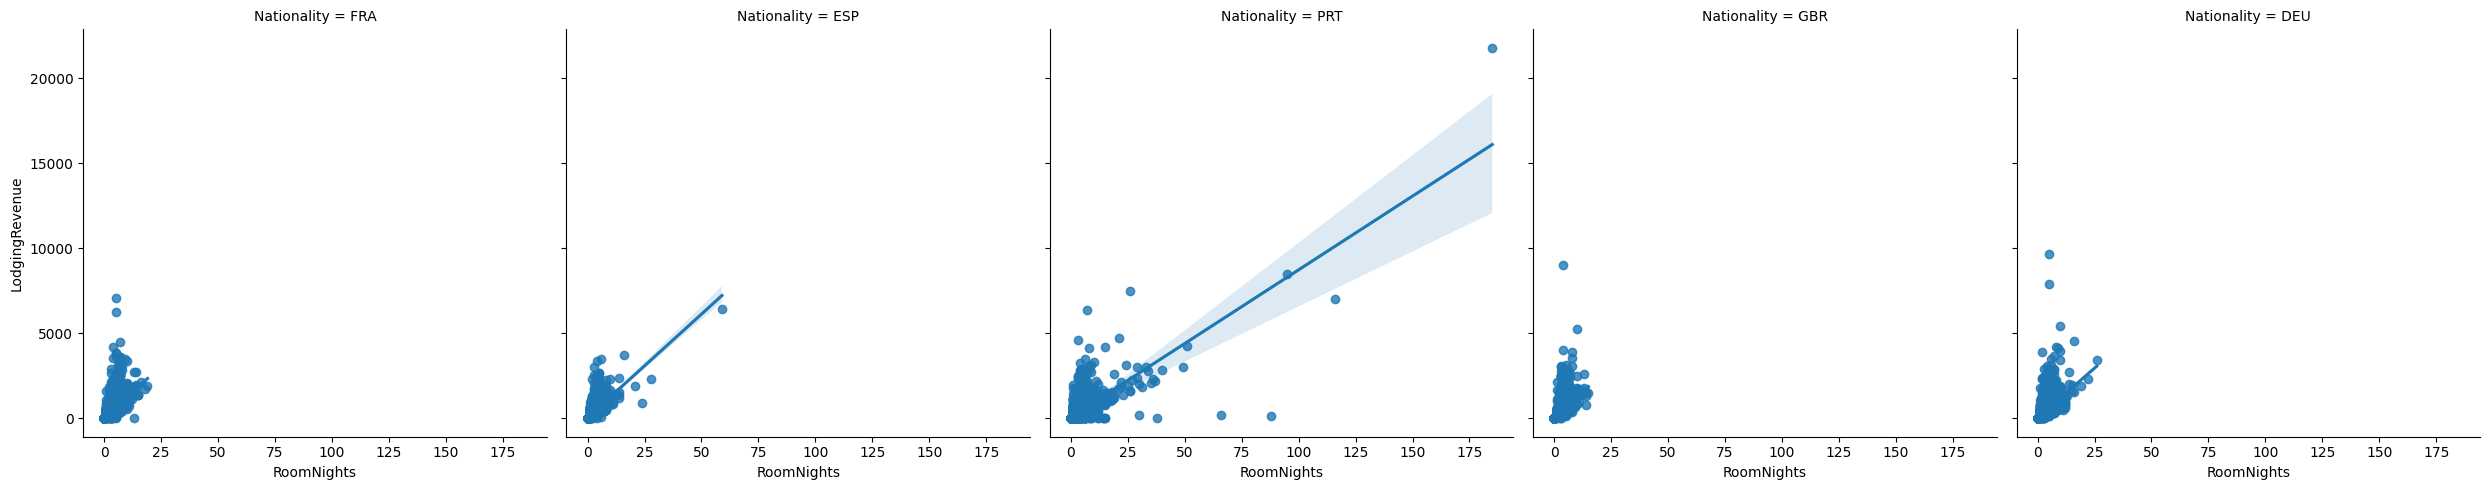

In [109]:
sns.lmplot(
    data=top_five_countries,
    y='LodgingRevenue',
    x='RoomNights',
    col='Nationality'
)

# Assignment 4 Heatmaps

* Using the top 5 countries DataFrame, Build a heatmap of Nationality as rows and MarketSegment as columns with the mean value of LodgingRevenue in each cell.

* Then, build a heatmap of the correlation matrix created when using the .corr() method on the hotels dataframe. Use the 'vlag' color palette.

In [122]:
hotels_pivot = hotels[hotels['Nationality'].isin(["DEU", "FRA", "PRT", "GBR", "ESP"])].pivot_table(
    index='Nationality',
    columns='MarketSegment',
    values={'LodgingRevenue':'mean'}
)

<Axes: xlabel='MarketSegment', ylabel='Nationality'>

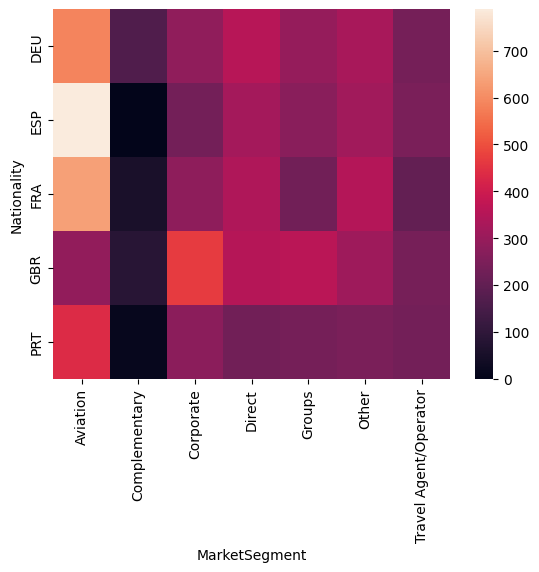

In [124]:
sns.heatmap(
    data=hotels_pivot.droplevel(0, axis=1)
)